<a href="https://colab.research.google.com/github/rlackdrhkd/Do-it-deep-learning/blob/main/Do_it_%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes #당뇨병 데이터 가져오기
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape,diabetes.target.shape) #입력 데이터와 타깃 데이터의 크기 확인

(442, 10) (442,)


In [ ]:
diabetes.data[0:3] #입력 데이터 자세히 보기

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
diabetes.target[:3] #타겟 데이터 자세히 보기

array([151.,  75., 141.])

<function matplotlib.pyplot.show(*args, **kw)>

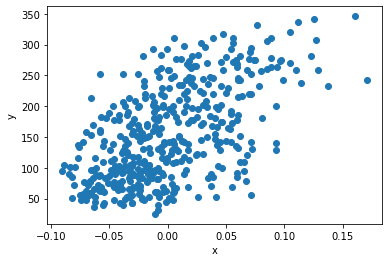

In [ ]:
import matplotlib.pyplot as plt #당뇨병 환자 데이터 시각화하기
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel("x")
plt.ylabel("y")
plt.show

In [ ]:
x = diabetes.data[:,2] #훈련 데이터 준비하기
y = diabetes.target

In [ ]:
w = 1.0 #w와b 초기화하기
b = 1.0

In [ ]:
y_hat = x[0]*w + b #훈련데이터의 첫 번째 샘플 데이터로 y_hat얻기
print(y_hat)

1.0616962065186886


In [ ]:
print(y[0]) #타깃과 예측 데이터 비교하기

151.0


In [ ]:
w_inc = w + 0.1 #w값 조절해 예측값 바꾸기
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705574


In [ ]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w) #w값 조정한 후 예측값 증가 정도 확인하기
print(w_rate)

0.061696206518688734


In [ ]:
w_new = w + w_rate #변화율로 가중치 업데이트하기
print(w_new)

1.0616962065186888


In [ ]:
b_inc = b + 0.1 #변화율로 절편 업데이트하기
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


In [ ]:
b_new = b + 1
print(b_new)

2.0


In [ ]:
#오차 역전파로 가중치와 절편을 더 적절하게 업데이트합니다
err = y[0] - y_hat #오차와 변화율을 곱하여 가중치 업데이트하기
w_new = w + w_rate * err
b_new = b + 1*err
print(w_new,b_new)

10.250624555904514 150.9383037934813


In [ ]:
y_hat = x[1]* w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new,b_new)

14.132317616381767 75.52764127612664


In [ ]:
for x_i, y_i in zip(x,y): #Repeat all of sample
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1*err
print(w,b)

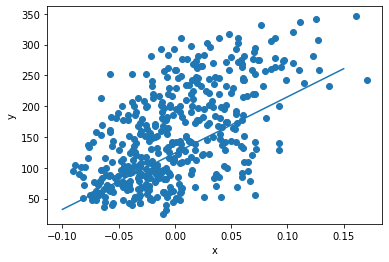

In [ ]:
plt.scatter(x,y) #Data Visualization
pt1 = (-0.1,-0.1 * w + b)
pt2 = (0.15,0.15 * w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
for i in range(1,100): #Repeat some of epoch
  for x_i,y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w,b)

913.5973364345905 123.39414383177204


In [ ]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


<function matplotlib.pyplot.show(*args, **kw)>

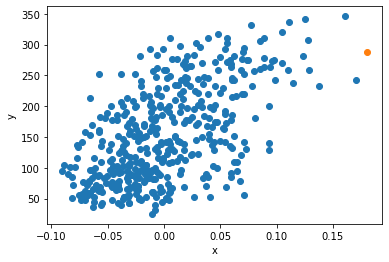

In [ ]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show

In [ ]:
y_hat = x_i * w + b #가중치에 대하여 제곱 오차 미분하기
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err

In [ ]:
err = y_i - y_hat
b = b + 1*err

In [ ]:
class Neuron:

  def __init__(self): #Fill in __init__ method
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x):
    y_hat = x * self.w + self.b #calculate straight line function
    return y_hat

  def backprop(self, x, err):
    w_grad = x * err #calculate gradient about weight
    b_grad = 1 * err #calculate gradient about intercept  
    return w_grad, b_grad

  def fit(self,x,y,epochs=100):
    for i in range(epochs):                       #Repeat by epochs
      for x_i, y_i in zip(x,y):                   #Repeat about every sample
        y_hat = self.forpass(x_i)                 #Forpass Calculation
        err = -(y_i - y_hat)                      #Error Calculation
        w_grad, b_grad = self.backprop(x_i,err)   #Backprop Calculation
        self.w -= w_grad                          #Update weight
        self.b -= b_grad                          #Update intercept

In [ ]:
neuron = Neuron()
neuron.fit(x,y)